<a href="https://colab.research.google.com/github/Robin-01/California-Coastal-Sea-Currents/blob/main/Wind_and_Sea_Current_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install cartopy

In [6]:
import cartopy
print(cartopy.__version__)

0.25.0


In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

wind_path = xr.open_dataset('/content/drive/MyDrive/UW_DSO_Project/Wind Data/wind_california.nc')
current_path = xr.open_dataset('/content/drive/MyDrive/UW_DSO_Project/uswc_6km_Resolution_Hourly_RTV_best_2024_2025.nc4')

wind_ds = wind_path
current_ds = current_path

In [8]:
wind_ds

<xarray.Dataset> Size: 223MB
Dimensions:    (time: 1464, latitude: 108, longitude: 88)
Coordinates:
  * latitude   (latitude) float32 432B 24.12 24.38 24.62 ... 50.38 50.62 50.88
  * longitude  (longitude) float32 352B 229.1 229.4 229.6 ... 250.4 250.6 250.9
  * time       (time) datetime64[ns] 12kB 2024-01-01 ... 2024-12-31T18:00:00
Data variables:
    uwnd       (time, latitude, longitude) float32 56MB ...
    vwnd       (time, latitude, longitude) float32 56MB ...
    ws         (time, latitude, longitude) float32 56MB ...
    nobs       (time, latitude, longitude) float32 56MB ...
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_end:             2024-01-01T23:59:59Z
    platform:                      Space-based Platforms>Earth Observation Sa...
    instrument:                    Earth Remote Sensing Instruments>Passive R...
    history:                       2024-07-18T13:07:56.387608Z - netCDF gener...
    base_date:                     Y2024 M01 D01
    date_created:                  2024-07-18T13:07:56.387608Z

In [9]:
current_ds

<xarray.Dataset> Size: 8GB
Dimensions:   (time: 12341, lat: 367, lon: 234)
Coordinates:
    time_run  (time) datetime64[ns] 99kB ...
  * time      (time) datetime64[ns] 99kB 2024-01-01 ... 2025-05-29T04:00:00
  * lat       (lat) float32 1kB 30.25 30.3 30.36 30.41 ... 49.88 49.94 49.99
  * lon       (lon) float32 936B -130.4 -130.3 -130.2 ... -115.9 -115.9 -115.8
Data variables:
    u         (time, lat, lon) float32 4GB ...
    wgs84     int8 1B ...
    v         (time, lat, lon) float32 4GB ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202505141600siohfruwlsrtvuswc6km
    date_created:              2025-05-14T18:24:43Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
    ...                        ...
    format_version:            1.1.00
    product_version:           2.0.00
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:HFRADAR_US_West_Coast_6km_Resolutio...
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...

In [10]:
print(wind_ds)

<xarray.Dataset> Size: 223MB
Dimensions:    (time: 1464, latitude: 108, longitude: 88)
Coordinates:
  * latitude   (latitude) float32 432B 24.12 24.38 24.62 ... 50.38 50.62 50.88
  * longitude  (longitude) float32 352B 229.1 229.4 229.6 ... 250.4 250.6 250.9
  * time       (time) datetime64[ns] 12kB 2024-01-01 ... 2024-12-31T18:00:00
Data variables:
    uwnd       (time, latitude, longitude) float32 56MB ...
    vwnd       (time, latitude, longitude) float32 56MB ...
    ws         (time, latitude, longitude) float32 56MB ...
    nobs       (time, latitude, longitude) float32 56MB ...
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...            

In [11]:
print(current_ds)

<xarray.Dataset> Size: 8GB
Dimensions:   (time: 12341, lat: 367, lon: 234)
Coordinates:
    time_run  (time) datetime64[ns] 99kB ...
  * time      (time) datetime64[ns] 99kB 2024-01-01 ... 2025-05-29T04:00:00
  * lat       (lat) float32 1kB 30.25 30.3 30.36 30.41 ... 49.88 49.94 49.99
  * lon       (lon) float32 936B -130.4 -130.3 -130.2 ... -115.9 -115.9 -115.8
Data variables:
    u         (time, lat, lon) float32 4GB ...
    wgs84     int8 1B ...
    v         (time, lat, lon) float32 4GB ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202505141600siohfruwlsrtvuswc6km
    date_created:              2025-05-14T18:24:43Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
    ...                        ...
    format_version:            1.1.00
    product_ver

In [12]:
# Convert wind longitude from 0-360 to -180 to 180
wind_ds.coords['longitude'] = (wind_ds.coords['longitude'] + 180) % 360 - 180

# Sort the dataset by the new longitude values to ensure it's in order
wind_ds = wind_ds.sortby(wind_ds.longitude)

# Verify the change
print("--- Wind Data after Longitude Conversion ---")
print(wind_ds.coords['longitude'].values)

--- Wind Data after Longitude Conversion ---
[-130.875 -130.625 -130.375 -130.125 -129.875 -129.625 -129.375 -129.125
 -128.875 -128.625 -128.375 -128.125 -127.875 -127.625 -127.375 -127.125
 -126.875 -126.625 -126.375 -126.125 -125.875 -125.625 -125.375 -125.125
 -124.875 -124.625 -124.375 -124.125 -123.875 -123.625 -123.375 -123.125
 -122.875 -122.625 -122.375 -122.125 -121.875 -121.625 -121.375 -121.125
 -120.875 -120.625 -120.375 -120.125 -119.875 -119.625 -119.375 -119.125
 -118.875 -118.625 -118.375 -118.125 -117.875 -117.625 -117.375 -117.125
 -116.875 -116.625 -116.375 -116.125 -115.875 -115.625 -115.375 -115.125
 -114.875 -114.625 -114.375 -114.125 -113.875 -113.625 -113.375 -113.125
 -112.875 -112.625 -112.375 -112.125 -111.875 -111.625 -111.375 -111.125
 -110.875 -110.625 -110.375 -110.125 -109.875 -109.625 -109.375 -109.125]


In [13]:
# Rename 'lat' and 'lon' in the current dataset
current_ds = current_ds.rename({'lon': 'longitude', 'lat': 'latitude'})

# Verify the change
print("\n--- Sea Current Data after Renaming Coords ---")
print(current_ds)


--- Sea Current Data after Renaming Coords ---
<xarray.Dataset> Size: 8GB
Dimensions:    (time: 12341, latitude: 367, longitude: 234)
Coordinates:
    time_run   (time) datetime64[ns] 99kB ...
  * time       (time) datetime64[ns] 99kB 2024-01-01 ... 2025-05-29T04:00:00
  * latitude   (latitude) float32 1kB 30.25 30.3 30.36 ... 49.88 49.94 49.99
  * longitude  (longitude) float32 936B -130.4 -130.3 -130.2 ... -115.9 -115.8
Data variables:
    u          (time, latitude, longitude) float32 4GB ...
    wgs84      int8 1B ...
    v          (time, latitude, longitude) float32 4GB ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202505141600siohfruwlsrtvuswc6km
    date_created:              2025-05-14T18:24:43Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
 

In [14]:
# Select data for the year 2024 from both datasets
wind_2024 = wind_ds.sel(time=slice('2024-01-01', '2024-12-31'))
current_2024 = current_ds.sel(time=slice('2024-01-01', '2024-12-31'))

# Verify the time range of the new current dataset
print("\n--- Sea Current Data after Time Selection ---")
print(current_2024.time)


--- Sea Current Data after Time Selection ---
<xarray.DataArray 'time' (time: 8784)> Size: 70kB
array(['2024-01-01T00:00:00.000000000', '2024-01-01T01:00:00.000000000',
       '2024-01-01T02:00:00.000000000', ..., '2024-12-31T21:00:00.000000000',
       '2024-12-31T22:00:00.000000000', '2024-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_run  (time) datetime64[ns] 70kB ...
  * time      (time) datetime64[ns] 70kB 2024-01-01 ... 2024-12-31T23:00:00
Attributes:
    long_name:            Forecast time for ForecastModelRunCollection
    standard_name:        time
    _CoordinateAxisType:  Time


In [15]:
# Rename variables in the wind dataset
wind_2024 = wind_2024.rename({'uwnd': 'wind_u', 'vwnd': 'wind_v'})

# Rename variables in the current dataset
current_2024 = current_2024.rename({'u': 'current_u', 'v': 'current_v'})

# Verify the changes
print("\n--- Wind Data with New Variable Names ---")
print(wind_2024)
print("\n--- Current Data with New Variable Names ---")
print(current_2024)


--- Wind Data with New Variable Names ---
<xarray.Dataset> Size: 223MB
Dimensions:    (time: 1464, latitude: 108, longitude: 88)
Coordinates:
  * latitude   (latitude) float32 432B 24.12 24.38 24.62 ... 50.38 50.62 50.88
  * time       (time) datetime64[ns] 12kB 2024-01-01 ... 2024-12-31T18:00:00
  * longitude  (longitude) float32 352B -130.9 -130.6 -130.4 ... -109.4 -109.1
Data variables:
    wind_u     (time, latitude, longitude) float32 56MB ...
    wind_v     (time, latitude, longitude) float32 56MB ...
    ws         (time, latitude, longitude) float32 56MB ...
    nobs       (time, latitude, longitude) float32 56MB ...
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id

In [16]:
# Define a more specific bounding box for the California coast
# The slice must be from smaller to larger value to match the coordinate order
cali_lat_bounds = slice(32, 42) # Corrected order
cali_lon_bounds = slice(-125, -117)

# Apply the new bounds to both datasets
wind_cali = wind_2024.sel(latitude=cali_lat_bounds,
                          longitude=cali_lon_bounds)

current_cali = current_2024.sel(latitude=cali_lat_bounds,
                                longitude=cali_lon_bounds)

# Print the dimensions to see the new, smaller size
print("--- California Wind Subset Dimensions (Corrected) ---")
print(wind_cali.dims)

print("\n--- California Current Subset Dimensions (Corrected) ---")
print(current_cali.dims)

--- California Wind Subset Dimensions (Corrected) ---
FrozenMappingWarningOnValuesAccess({'time': 1464, 'latitude': 40, 'longitude': 32})

--- California Current Subset Dimensions (Corrected) ---
FrozenMappingWarningOnValuesAccess({'time': 8784, 'latitude': 185, 'longitude': 128})


In [17]:
# Use the interpolation method to regrid the wind data
# This makes the wind data's lat/lon coordinates exactly match the current data's
print("Regridding wind data... (this may take a moment)")
wind_regridded = wind_cali.interp(
    latitude=current_cali['latitude'],
    longitude=current_cali['longitude'],
    method='linear'
)

# Verify that the dimensions now match
print("\n--- Original Current Data Dimensions ---")
print(current_cali.dims)
print("\n--- Regridded Wind Data Dimensions ---")
print(wind_regridded.dims)

Regridding wind data... (this may take a moment)

--- Original Current Data Dimensions ---
FrozenMappingWarningOnValuesAccess({'time': 8784, 'latitude': 185, 'longitude': 128})

--- Regridded Wind Data Dimensions ---
FrozenMappingWarningOnValuesAccess({'time': 1464, 'latitude': 185, 'longitude': 128})


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
Exception ignored in: <function CachingFileManager.__del__ at 0x7e78b479ae80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1708, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 630, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 56, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 57, in h5py._objects.with_phil.wrapper
  File

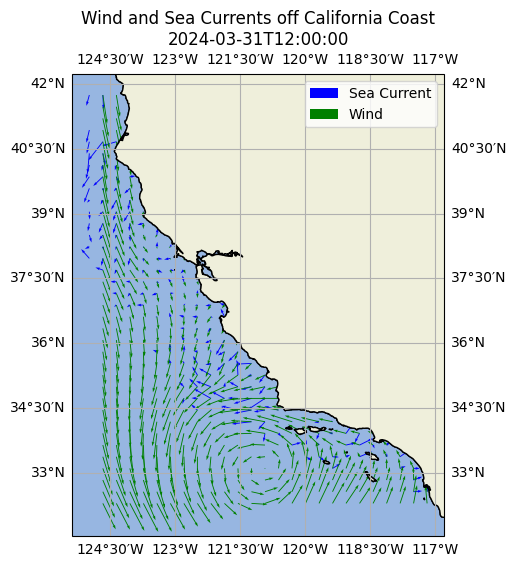

In [18]:
# --- Select a Single Time Slice to Plot ---
# Let's pick a summer day when upwelling is common.
# We use method='nearest' to get the closest time available in each dataset.
plot_date = '2024-03-31T12:00:00'
current_snapshot = current_cali.sel(time=plot_date, method='nearest')
wind_snapshot = wind_regridded.sel(time=plot_date, method='nearest')

# --- Create the Map ---
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features for context
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=2)
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# --- Plot the Vectors ---
# To avoid a cluttered plot, we'll only plot every Nth arrow using a 'stride'.
stride = 5

# Plot Sea Currents (in blue)
ax.quiver(current_snapshot.longitude[::stride], current_snapshot.latitude[::stride],
          current_snapshot.current_u[::stride, ::stride], current_snapshot.current_v[::stride, ::stride],
          color='blue', scale=10, label='Sea Current')

# Plot Wind Vectors (in green) on top
ax.quiver(wind_snapshot.longitude[::stride], wind_snapshot.latitude[::stride],
          wind_snapshot.wind_u[::stride, ::stride], wind_snapshot.wind_v[::stride, ::stride],
          color='green', scale=200, label='Wind')

# --- Finalize the Plot ---
ax.legend()
ax.set_title(f'Wind and Sea Currents off California Coast\n{plot_date}')
plt.show()

In [19]:
!pip install imageio

In [20]:
import os
import imageio
from IPython.display import Image

# Create a directory to save the animation frames
frames_dir = 'animation_frames'
if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

In [21]:
# Define the time range for the animation (first 3 months)
animation_dates = pd.date_range(start='2024-01-01', end='2024-02-10', freq='D')

print(f"Generating {len(animation_dates)} frames for the animation...")

for i, plot_date in enumerate(animation_dates):
    # Select data for the current day
    current_snapshot = current_cali.sel(time=plot_date, method='nearest')
    wind_snapshot = wind_regridded.sel(time=plot_date, method='nearest')

    # --- Create the Map ---
    fig = plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black', zorder=2)
    ax.add_feature(cfeature.OCEAN, zorder=1)
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # --- Plot the Vectors ---
    stride = 8
    ax.quiver(current_snapshot.longitude[::stride], current_snapshot.latitude[::stride],
              current_snapshot.current_u[::stride, ::stride], current_snapshot.current_v[::stride, ::stride],
              color='blue', scale=10, label='Sea Current')
    ax.quiver(wind_snapshot.longitude[::stride], wind_snapshot.latitude[::stride],
              wind_snapshot.wind_u[::stride, ::stride], wind_snapshot.wind_v[::stride, ::stride],
              color='green', scale=200, label='Wind')

    # --- Finalize and Save the Plot ---
    ax.legend()
    ax.set_title(f'Wind and Sea Currents off California Coast\n{plot_date.strftime("%Y-%m-%d")}')

    # Save the frame
    filename = os.path.join(frames_dir, f'frame_{i:03d}.png')
    plt.savefig(filename)
    plt.close(fig) # Close the figure to free up memory

print("All frames generated successfully.")

Generating 41 frames for the animation...
All frames generated successfully.


/tmp/ipython-input-1258570485.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Animation saved to california_currents_animation.gif


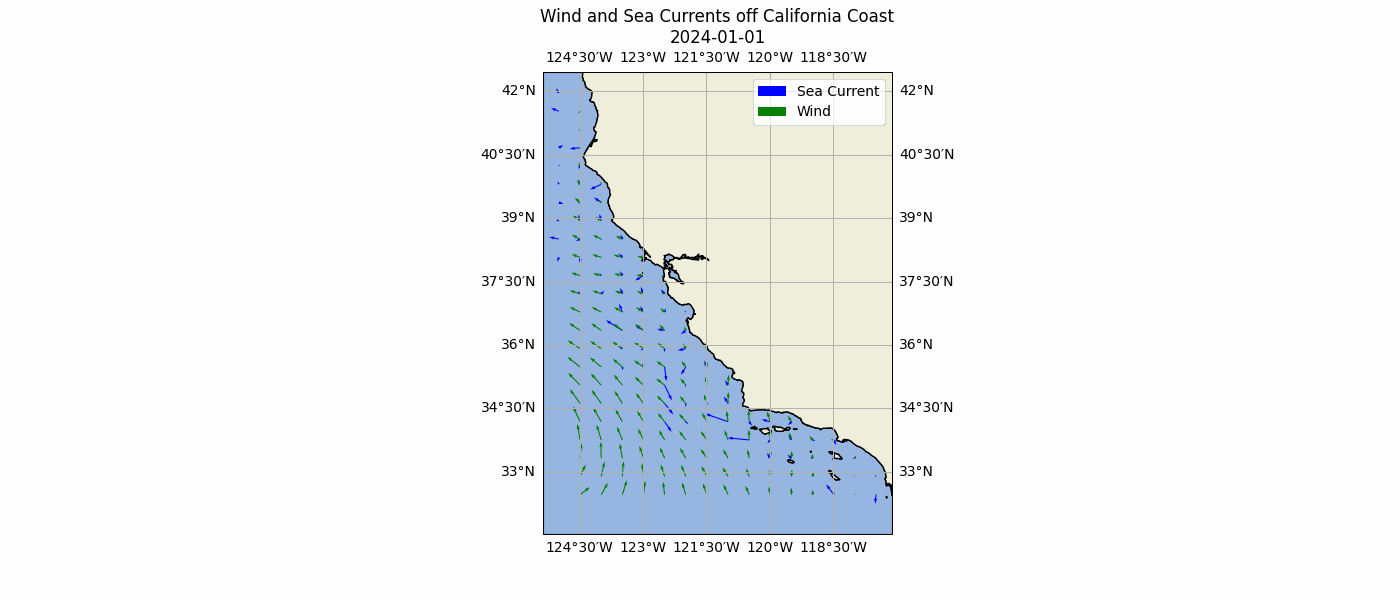

In [22]:
from google.colab import files

# Get a sorted list of all the frame filenames
frame_files = sorted([os.path.join(frames_dir, f) for f in os.listdir(frames_dir) if f.endswith('.png')])

# Create the GIF
gif_path = 'california_currents_animation.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.5, loop=0) as writer:
    for filename in frame_files:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"Animation saved to {gif_path}")

# Display the GIF
Image(open(gif_path,'rb').read())

In [23]:
!pip install imageio-ffmpeg

In [ ]:
# files.download('california_currents_animation.mp4')

In [2]:
import imageio
import os
from IPython.display import Video

# Get a sorted list of all the frame filenames
frame_files = sorted([os.path.join('animation_frames', f) for f in os.listdir('animation_frames') if f.endswith('.png')])

# Define the output video path and frames per second (fps)
video_path = 'california_currents_animation.mp4'
fps = 5 # Frames Per Second

# Create the video
with imageio.get_writer(video_path, mode='I', fps=fps, codec='libx264') as writer:
    for filename in frame_files:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"Video saved to {video_path}")

# Display the video in the notebook
Video(video_path, embed=True)

/tmp/ipython-input-88634530.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Video saved to california_currents_animation.mp4


In [3]:
import numpy as np
import pandas as pd
import gc # Garbage Collector interface

# --- Steps 1-4: Standardize and Clean Data ---
print("Step 1: Standardizing Datasets...")

# Check if wind longitude needs conversion
if wind_ds.longitude.max() > 180:
    wind_ds.coords['longitude'] = (wind_ds.coords['longitude'] + 180) % 360 - 180
    wind_ds = wind_ds.sortby(wind_ds.longitude)

# Check if current coordinate names need renaming
if 'lon' in current_ds.coords:
    current_ds = current_ds.rename({'lon': 'longitude', 'lat': 'latitude'})

# *** MEMORY SAVING CHANGE: Only process 6 months of data ***
time_slice = slice('2024-01-01', '2024-06-30')
wind_2024 = wind_ds.sel(time=time_slice)
current_2024 = current_ds.sel(time=time_slice)
# --- MEMORY CLEANUP ---
del wind_ds
del current_ds
gc.collect()

# Standardize data variable names
wind_2024 = wind_2024.rename({'uwnd': 'wind_u', 'vwnd': 'wind_v'})
current_2024 = current_2024.rename({'u': 'current_u', 'v': 'current_v'})

# --- Step 5: Subset to California Coast ---
print("Step 2: Subsetting to California Coast...")
cali_lat_bounds = slice(32, 42)
cali_lon_bounds = slice(-125, -117)
wind_cali = wind_2024.sel(latitude=cali_lat_bounds, longitude=cali_lon_bounds)
current_cali = current_2024.sel(latitude=cali_lat_bounds, longitude=cali_lon_bounds)
# --- MEMORY CLEANUP ---
del wind_2024
del current_2024
gc.collect()

# --- Step 6: Regrid the Data ---
print("Step 3: Regridding Wind Data...")
wind_regridded = wind_cali.interp(
    latitude=current_cali['latitude'],
    longitude=current_cali['longitude'],
    method='linear'
)
# --- MEMORY CLEANUP ---
del wind_cali
gc.collect()

# --- Step 8: Prepare Final DataFrame for ML ---
print("Step 4: Creating Final DataFrame...")
df_wind = wind_regridded.to_dataframe()
df_current = current_cali.to_dataframe()
# --- MEMORY CLEANUP ---
del wind_regridded
del current_cali
gc.collect()

df_combined = df_wind.join(df_current, how='inner')
# --- MEMORY CLEANUP ---
del df_wind
del df_current
gc.collect()

df_combined['day_of_year_sin'] = np.sin(2 * np.pi * df_combined.index.get_level_values('time').dayofyear / 366)
df_combined['day_of_year_cos'] = np.cos(2 * np.pi * df_combined.index.get_level_values('time').dayofyear / 366)
df_final = df_combined.reset_index()
df_final

Step 1: Standardizing Datasets...


NameError: name 'wind_ds' is not defined

In [1]:
# Define the columns for our features
features = ['wind_u', 'wind_v', 'latitude', 'longitude', 'day_of_year_sin', 'day_of_year_cos']
targets = ['current_u', 'current_v']

X = df_final[features]
y = df_final[targets]

print("Features (X) shape:", X.shape)
print("Targets (y) shape:", y.shape)

NameError: name 'df_final' is not defined

In [ ]:
wind_ds